In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Importing Dataset for Text Classification

In [25]:
df_new = pd.read_csv("Vodaphone_review_dataset.csv")

df_new.head()

,Rating,Review,Name,Location,Date,Clean_Review,Sentiment,Sentiment Label,Churn_Keyword,Churn,Review_Date,Review_Time,Weekday,Month,Review_Length,Word_Count
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,-0.020000,neutral,1,1,2025-06-05,22:03:24,Thursday,June,280,48
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0.700000,positive,0,0,2025-06-05,21:51:17,Thursday,June,68,13
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,-0.200000,neutral,0,1,2025-06-05,21:28:36,Thursday,June,154,34
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,0.275000,positive,0,1,2025-06-05,21:14:08,Thursday,June,240,44
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,-0.003634,neutral,1,1,2025-06-05,20:24:59,Thursday,June,1620,320


In [26]:
df_new = df_new[df_new['Clean_Review'].notna()]

In [27]:
df_new.Clean_Review.isnull().sum()

0

In [28]:
df_new.columns

Index(['Rating', 'Review', 'Name', 'Location', 'Date', 'Clean_Review',
       'Sentiment', 'Sentiment Label', 'Churn_Keyword', 'Churn', 'Review_Date',
       'Review_Time', 'Weekday', 'Month', 'Review_Length', 'Word_Count'],
      dtype='object')

In [29]:
df_new = df_new.drop(columns=['Sentiment', 'Sentiment Label', 'Churn_Keyword', 'Review',  'Review_Length', 'Word_Count'])

df_new.head()

,Rating,Name,Location,Date,Clean_Review,Churn,Review_Date,Review_Time,Weekday,Month
0,1,Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,1,2025-06-05,22:03:24,Thursday,June
1,5,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0,2025-06-05,21:51:17,Thursday,June
2,1,Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,1,2025-06-05,21:28:36,Thursday,June
3,1,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,1,2025-06-05,21:14:08,Thursday,June
4,1,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,1,2025-06-05,20:24:59,Thursday,June


In [30]:
df_new.columns

Index(['Rating', 'Name', 'Location', 'Date', 'Clean_Review', 'Churn',
       'Review_Date', 'Review_Time', 'Weekday', 'Month'],
      dtype='object')

In [31]:
df_new.isna().sum()

Rating          0
Name            2
Location        0
Date            0
Clean_Review    0
Churn           0
Review_Date     0
Review_Time     0
Weekday         0
Month           0
dtype: int64

## Word Cloud from Reviews

### 1. World Cloud for All Reviews

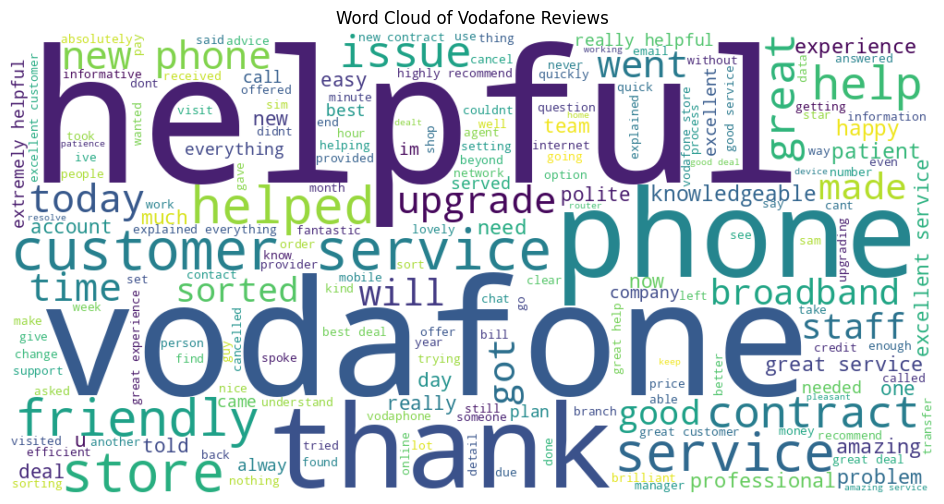

In [32]:
# Combining all text reviews into one string
all_reviews = " ".join(df_new['Clean_Review'].dropna())

# Generating the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Vodafone Reviews')
plt.show()

### 2. World Cloud for Churn Reviews 

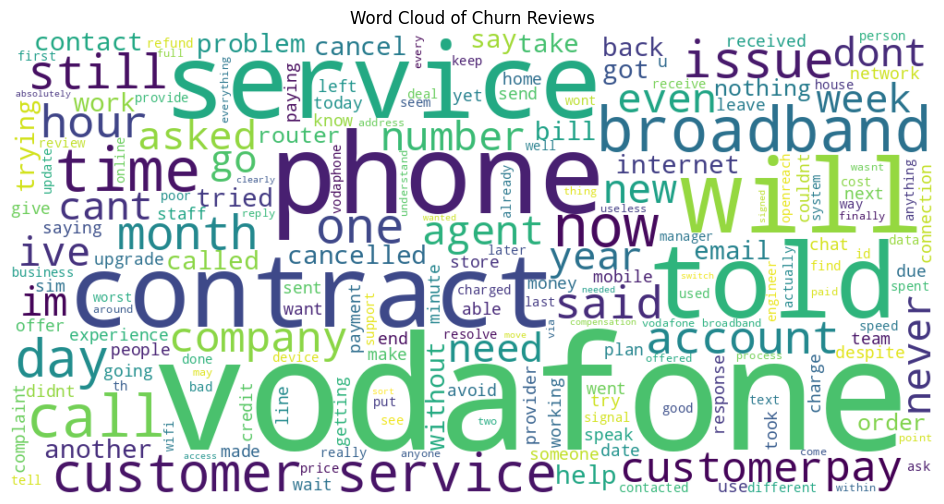

In [33]:
churn_reviews = " ".join(df_new[df_new['Churn'] == 1]['Clean_Review'].dropna())

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(churn_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Churn Reviews')
plt.show()


### TF-IDF Classification

In [34]:
# Importing necessary libraries for text classification

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [35]:
# Creating feature matrix and target vector

X = df_new['Clean_Review']
y = df_new['Churn']

In [36]:
# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
X.isna().sum()

0

In [38]:
# Vectorizing the text data using TF-IDF

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [39]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [40]:
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1728
           1       0.99      0.74      0.85       153

    accuracy                           0.98      1881
   macro avg       0.98      0.87      0.92      1881
weighted avg       0.98      0.98      0.98      1881



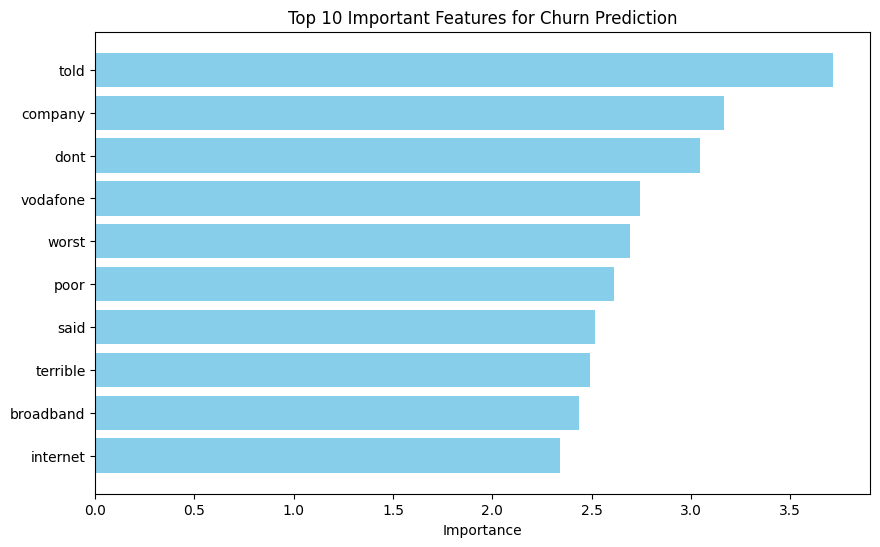

In [41]:
#Feature importance analysis

feature_names = vectorizer.get_feature_names_out()
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
top_features = feature_importance.head(10)      
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Important Features for Churn Prediction')
plt.gca().invert_yaxis()
plt.show()

In [42]:
# Handling class imbalance by using class weights

# Train with balanced class weights
model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
model_balanced.fit(X_train_tfidf, y_train)

# Predict
y_pred_balanced = model_balanced.predict(X_test_tfidf)

# Evaluate
print(classification_report(y_test, y_pred_balanced))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1728
           1       0.90      0.98      0.94       153

    accuracy                           0.99      1881
   macro avg       0.95      0.99      0.97      1881
weighted avg       0.99      0.99      0.99      1881



In [43]:
# Testing the model with a new reviews

#sample_reviews = df_new['Clean_Review'].sample(5, random_state=42).tolist()

sample_reviews = df_new['Clean_Review'].sample(5).tolist()



In [44]:
sample_reviews

['manoj is v good serviceshe is good person reallyi am very happy he is give me advance vodafone',
 'very helpful guy noah in crawley branch thinks thats his name shame vodafone has to charge to get your new fone up running now last time it was free',
 'i was served by ethan he was very helpful and did his best to find me the best deal for my needs i left very happy',
 'rushabh was very good and gave me a great treatment when ordering my new phonehe is a very smart and helpful person',
 'scottespecially also finley and later aiden all so helpful at worthing vodafone complicated account with my kids needing to be transferred added taken off readded upgraded then cancelled after a theft a nightmare for everyone but they were patient and kind when i had no idea what was going on thank you scott is the calmest and most patient person ever']

In [45]:
X_test_reviews = vectorizer.transform(sample_reviews)


In [46]:
predictions = model_balanced.predict(X_test_reviews)

for review, label in zip(sample_reviews, predictions):
    print(f"Review: {review}")
    print(f"Prediction: {'Churn' if label == 1 else 'No Churn'}")
    print("-" * 50)


Review: manoj is v good serviceshe is good person reallyi am very happy he is give me advance vodafone
Prediction: No Churn
--------------------------------------------------
Review: very helpful guy noah in crawley branch thinks thats his name shame vodafone has to charge to get your new fone up running now last time it was free
Prediction: No Churn
--------------------------------------------------
Review: i was served by ethan he was very helpful and did his best to find me the best deal for my needs i left very happy
Prediction: No Churn
--------------------------------------------------
Review: rushabh was very good and gave me a great treatment when ordering my new phonehe is a very smart and helpful person
Prediction: No Churn
--------------------------------------------------
Review: scottespecially also finley and later aiden all so helpful at worthing vodafone complicated account with my kids needing to be transferred added taken off readded upgraded then cancelled after a th

In [47]:
best_model = model_balanced

import joblib
# Save the model and vectorizer
joblib.dump(best_model, 'vodafone_churn_model.pkl')
joblib.dump(vectorizer, 'vodafone_vectorizer.pkl')

['vodafone_vectorizer.pkl']